In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

FCC model

In [2]:
def fcc_ucell(a, nc, rc):
    n = 4
    r = np.array([[0, 0, 0], [0.5, 0.5, 0], [0, 0.5, 0.5], [0.5, 0, 0.5]])
    ucell = 0
    for k in range(-nc, nc+1):
        for l in range(-nc, nc+1):
            for m in range(-nc, nc+1):
                for i in range(n):
                    for j in range(n):
                        dist = a * np.sqrt((k+r[j,0]-r[i,0]) ** 2 + (l+r[j,1]-r[i,1]) ** 2 + (m+r[j,2]-r[i,2]) ** 2)

                        if dist > 0 and dist <= rc:
                            u = 2 * (1/(dist ** 12) - 1/(dist ** 6))

                        else:
                            u = 0

                        ucell = ucell + u

    ucell = ucell/n
    return ucell

In [3]:
a = np.linspace(1.45, 1.65, 100)
rc = np.linspace(1, 5, 20)
u0 = []
for i in rc:
    u = []
    nc = int(i * 2)
    for j in a:
        u.append(fcc_ucell(j, nc, i))
    u0.append(min(u))

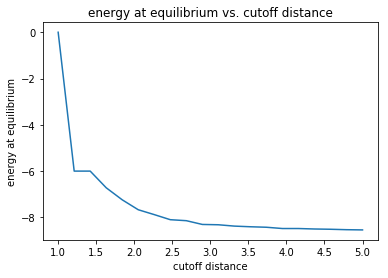

In [4]:
plt.plot(rc, u0)
plt.xlabel('cutoff distance')
plt.ylabel('energy at equilibrium')
plt.title('energy at equilibrium vs. cutoff distance')
plt.show()

BCC model

In [5]:
def bcc_ucell(a, nc, rc):
    n = 2
    r = np.array([[0, 0, 0], [0.5, 0.5, 0.5]])
    ucell = 0
    for k in range(-nc, nc+1):
        for l in range(-nc, nc+1):
            for m in range(-nc, nc+1):
                for i in range(n):
                    for j in range(n):
                        dist = a * np.sqrt((k+r[j,0]-r[i,0]) ** 2 + (l+r[j,1]-r[i,1]) ** 2 + (m+r[j,2]-r[i,2]) ** 2)

                        if dist > 0 and dist <= rc:
                            u = 2 * (1/(dist ** 12) - 1/(dist ** 6))

                        else:
                            u = 0

                        ucell = ucell + u

    ucell = ucell/n
    return ucell

In [6]:
a = np.linspace(1, 1.4, 100)
rc = np.linspace(1, 5, 20)
u0 = []
for i in rc:
    u = []
    nc = int(i * 2)
    for j in a:
        u.append(bcc_ucell(j, nc, i))
    u0.append(min(u))

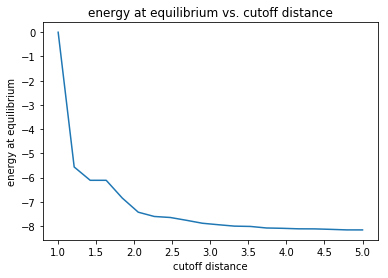

In [7]:
plt.plot(rc, u0)
plt.xlabel('cutoff distance')
plt.ylabel('energy at equilibrium')
plt.title('energy at equilibrium vs. cutoff distance')
plt.show()

According to the calculated results, to be stable for energy at equilibrium state, both of cutoff distances for FCC and BCC are at 3.5 ~ 4.0